### GANs use two networks competing against each other to generate data.

1) Generator : Recieves random noise (Gaussian Distribution).<br>
Outputs data (often an image)

2) Discriminator:<br>
Takes a data set consisting of real images from the real data set and fake images from the generator<br>
Attempt to classify real vs fake images (always binary classification)

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


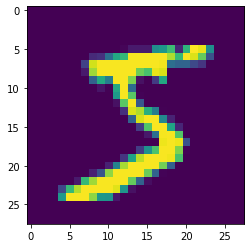

In [8]:
plt.imshow(X_train[0])

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# Filter data for faster training - Let us consider only 1 number out of the 10
only_zeros = X_train[y_train==0]

In [14]:
print(X_train.shape, only_zeros.shape)

(60000, 28, 28) (5923, 28, 28)


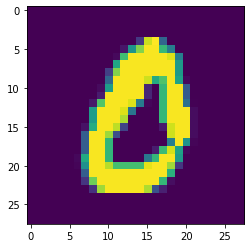

In [18]:
plt.imshow(only_zeros[19])

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [20]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
# Final output layer
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [21]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Choose codings_size with following in mind: 100 --> 150 --> 784
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))

# Discriminator expects shape of 28x28
generator.add(Reshape([28,28]))

# We do not compile the generator
GAN = Sequential([generator,discriminator])

In [31]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [32]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28)            143634    
_________________________________________________________________
sequential (Sequential)      (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [33]:
GAN.layers

In [34]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [23]:
discriminator.trainable = False # Shouldn't be trained in the second phase

In [24]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
batch_size = 32

my_data = only_zeros

In [26]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [27]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [28]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [29]:
epochs = 1

In [35]:
noise = tf.random.normal(shape=[batch_size,codings_size])
noise

<tf.Tensor: shape=(32, 100), dtype=float32, numpy=
array([[-0.17894243,  0.28046852, -1.2658674 , ..., -1.8558825 ,
         0.49134666, -0.02820994],
       [-0.57840776,  1.028697  ,  1.0578247 , ...,  1.2367849 ,
        -1.26806   , -0.07681153],
       [ 1.2107298 ,  1.1793936 , -0.17294073, ...,  1.1151178 ,
         0.6852811 ,  1.0923375 ],
       ...,
       [-0.23432946, -1.8061259 ,  0.12568073, ...,  0.70886606,
        -0.14349754, -0.61847156],
       [-1.3304747 , -1.5051615 , -0.9862153 , ...,  1.2475176 ,
        -1.0224384 ,  0.431593  ],
       [-0.12189417,  0.76724905,  0.23410986, ..., -1.2387109 ,
         1.165128  , -2.2503793 ]], dtype=float32)>

In [39]:
generator(noise)

<tf.Tensor: shape=(32, 28, 28), dtype=float32, numpy=
array([[[1.39178470e-01, 0.00000000e+00, 1.32437050e-01, ...,
         0.00000000e+00, 1.24021992e-01, 6.28608763e-02],
        [6.59890613e-03, 2.57760793e-01, 0.00000000e+00, ...,
         1.15738064e-01, 2.14011580e-01, 5.65851629e-02],
        [0.00000000e+00, 0.00000000e+00, 1.05919935e-01, ...,
         0.00000000e+00, 0.00000000e+00, 1.68934196e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 1.86894268e-01, ...,
         0.00000000e+00, 0.00000000e+00, 2.71052748e-01],
        [2.84300804e-01, 0.00000000e+00, 0.00000000e+00, ...,
         2.44469017e-01, 1.92485914e-01, 9.82135981e-02],
        [1.36533707e-01, 1.01417536e-02, 2.23434702e-01, ...,
         2.80212998e-01, 0.00000000e+00, 1.18388772e-01]],

       [[1.01866886e-01, 8.40153452e-03, 3.36099118e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.97205901e-01, 3.08540463e-01, 0.00000000e+00, ...,
         0.00000000e+00, 6.23

In [42]:
generator, discriminator = GAN.layers

for epoch in range(10): # 10 is number of epochs
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        
        i = i+1
        
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
        
        # DISCRIMINATOR TRAINING PHASE
        
        noise = tf.random.normal(shape=[batch_size,codings_size]) # GENERATOR gets to see only this random noise
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size) # 0 correspond to not real and vice-versa
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        # TRAIN GENERATOR
        noise = tf.random.normal(shape=[batch_size,codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        
        discriminator.trainable = False
        
        GAN.train_on_batch(noise,y2)
        
print("Training complete!")        

Currently on Epoch 1
	 Currently on batch number 100 of 185
Currently on Epoch 2
	 Currently on batch number 100 of 185
Currently on Epoch 3
	 Currently on batch number 100 of 185
Currently on Epoch 4
	 Currently on batch number 100 of 185
Currently on Epoch 5
	 Currently on batch number 100 of 185
Currently on Epoch 6
	 Currently on batch number 100 of 185
Currently on Epoch 7
	 Currently on batch number 100 of 185
Currently on Epoch 8
	 Currently on batch number 100 of 185
Currently on Epoch 9
	 Currently on batch number 100 of 185
Currently on Epoch 10
	 Currently on batch number 100 of 185
Training complete!


In [43]:
noise = tf.random.normal(shape=[10, codings_size])
noise.shape

TensorShape([10, 100])

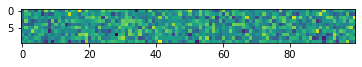

In [44]:
plt.imshow(noise)

In [47]:
image = generator(noise)
image.shape

TensorShape([10, 28, 28])

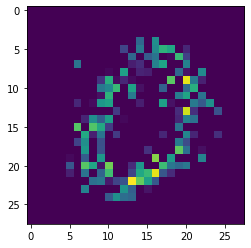

In [51]:
plt.imshow(image[5])

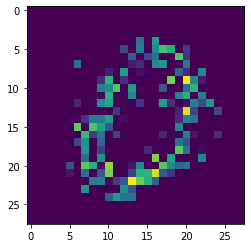

In [53]:
plt.imshow(image[1])  # Hence, model has undergone 'mode collapse'.

In [54]:
# DCGANs
X_train = X_train/255
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1.  # Because we will be using 'tanh' later

In [55]:
X_train.min()

-1.0

In [56]:
X_train.max()

1.0

In [57]:
only_zeros = X_train[y_train==0]

In [58]:
only_zeros.shape

(5923, 28, 28, 1)

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [61]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[codings_size]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))


In [62]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [63]:
GAN = Sequential([generator, discriminator])

In [64]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = False

In [65]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [66]:
GAN.layers

In [67]:
GAN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [68]:
GAN.layers[0].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
______________________________________________

In [69]:
batch_size = 32
my_data = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [70]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
epochs = 20

In [71]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%20 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185
	Currently on batch number 160 of 185
	Currently on batch number 180 of 185
Currently on Epoch 2
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185
	Currently on batch number 160 of 185
	Currently on batch number 180 of 185
Currently on Epoch 3
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185

In [72]:
noise = tf.random.normal(shape=[10, codings_size])
noise.shape

TensorShape([10, 100])

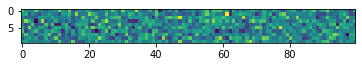

In [73]:
plt.imshow(noise)

In [74]:
images = generator(noise)

In [75]:
single_image = images[0]

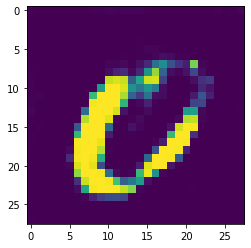

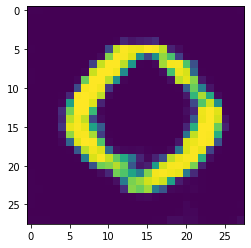

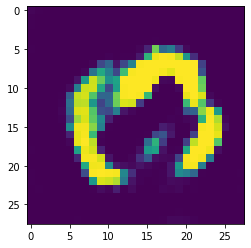

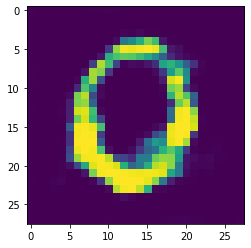

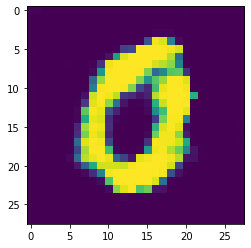

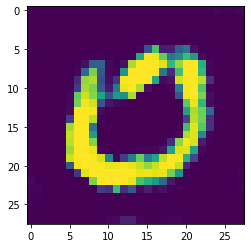

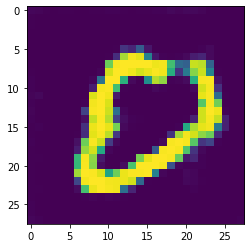

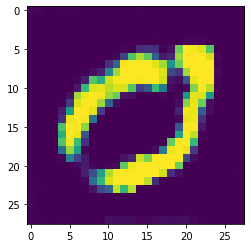

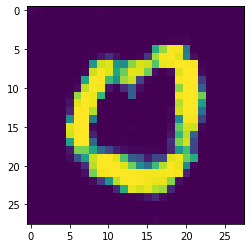

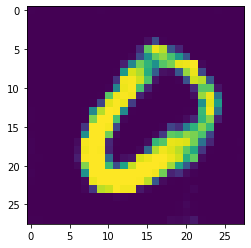

In [76]:
for image in images:
    plt.imshow(image.numpy().reshape(28,28))
    plt.show()

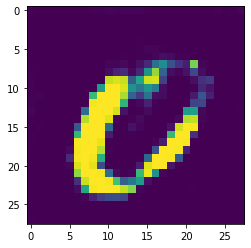

In [79]:
# Hence, mode collapse has been prevented.
plt.imshow(single_image.numpy().reshape(28,28))